# 💠FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS💠

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error

## 💠Data Preparation and Exploration

In [2]:
data=pd.read_csv('exchange_rate.csv')
print('Shape of data ',data.shape)
data.head()

Shape of data  (7588, 2)


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
data.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [6]:
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [7]:
data=data.sort_values('date')
data=data.set_index('date')

data.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7500
1990-01-03,0.7471
1990-01-04,0.7587
1990-01-05,0.7852


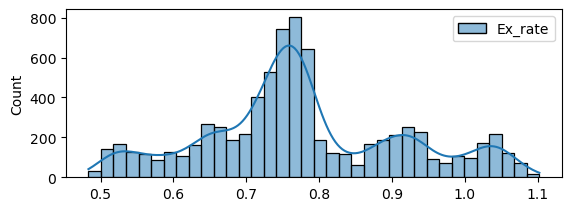

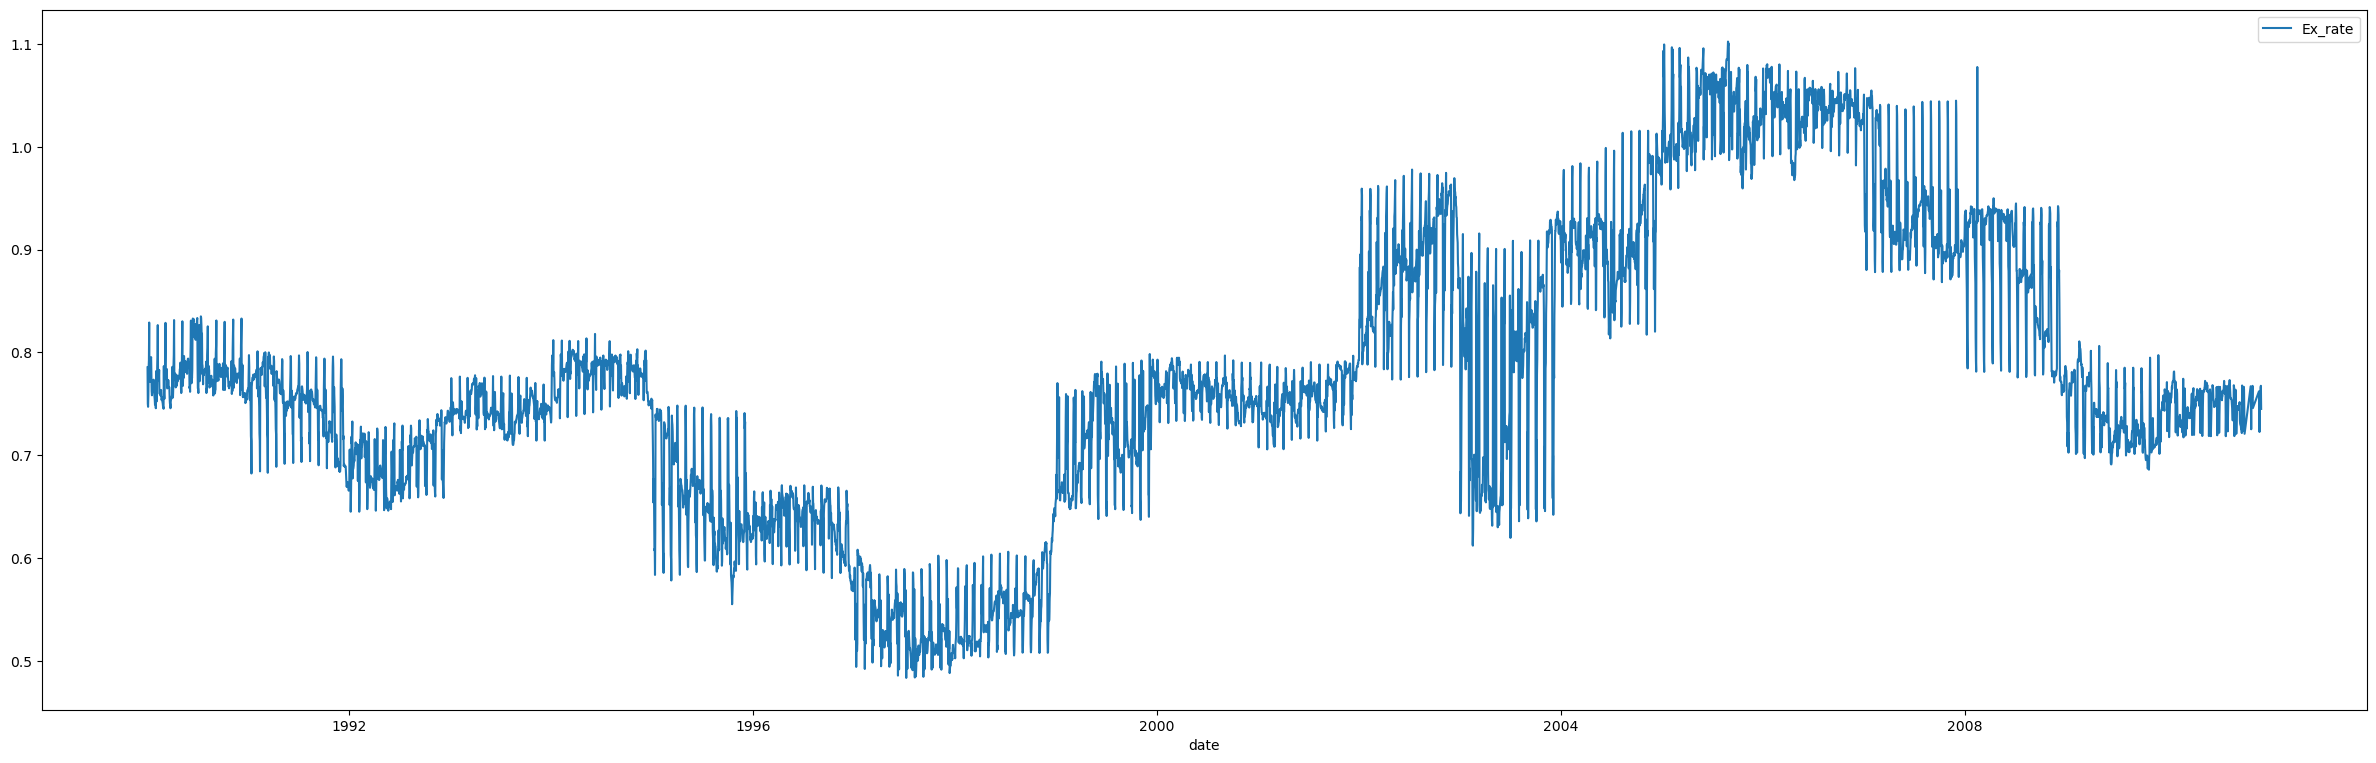

In [8]:
plt.subplot(2,1,1)
sns.histplot(data,kde=True)

plt.figure(figsize=(30,20))
plt.subplot(2,1,2)
sns.lineplot(data)

plt.show()

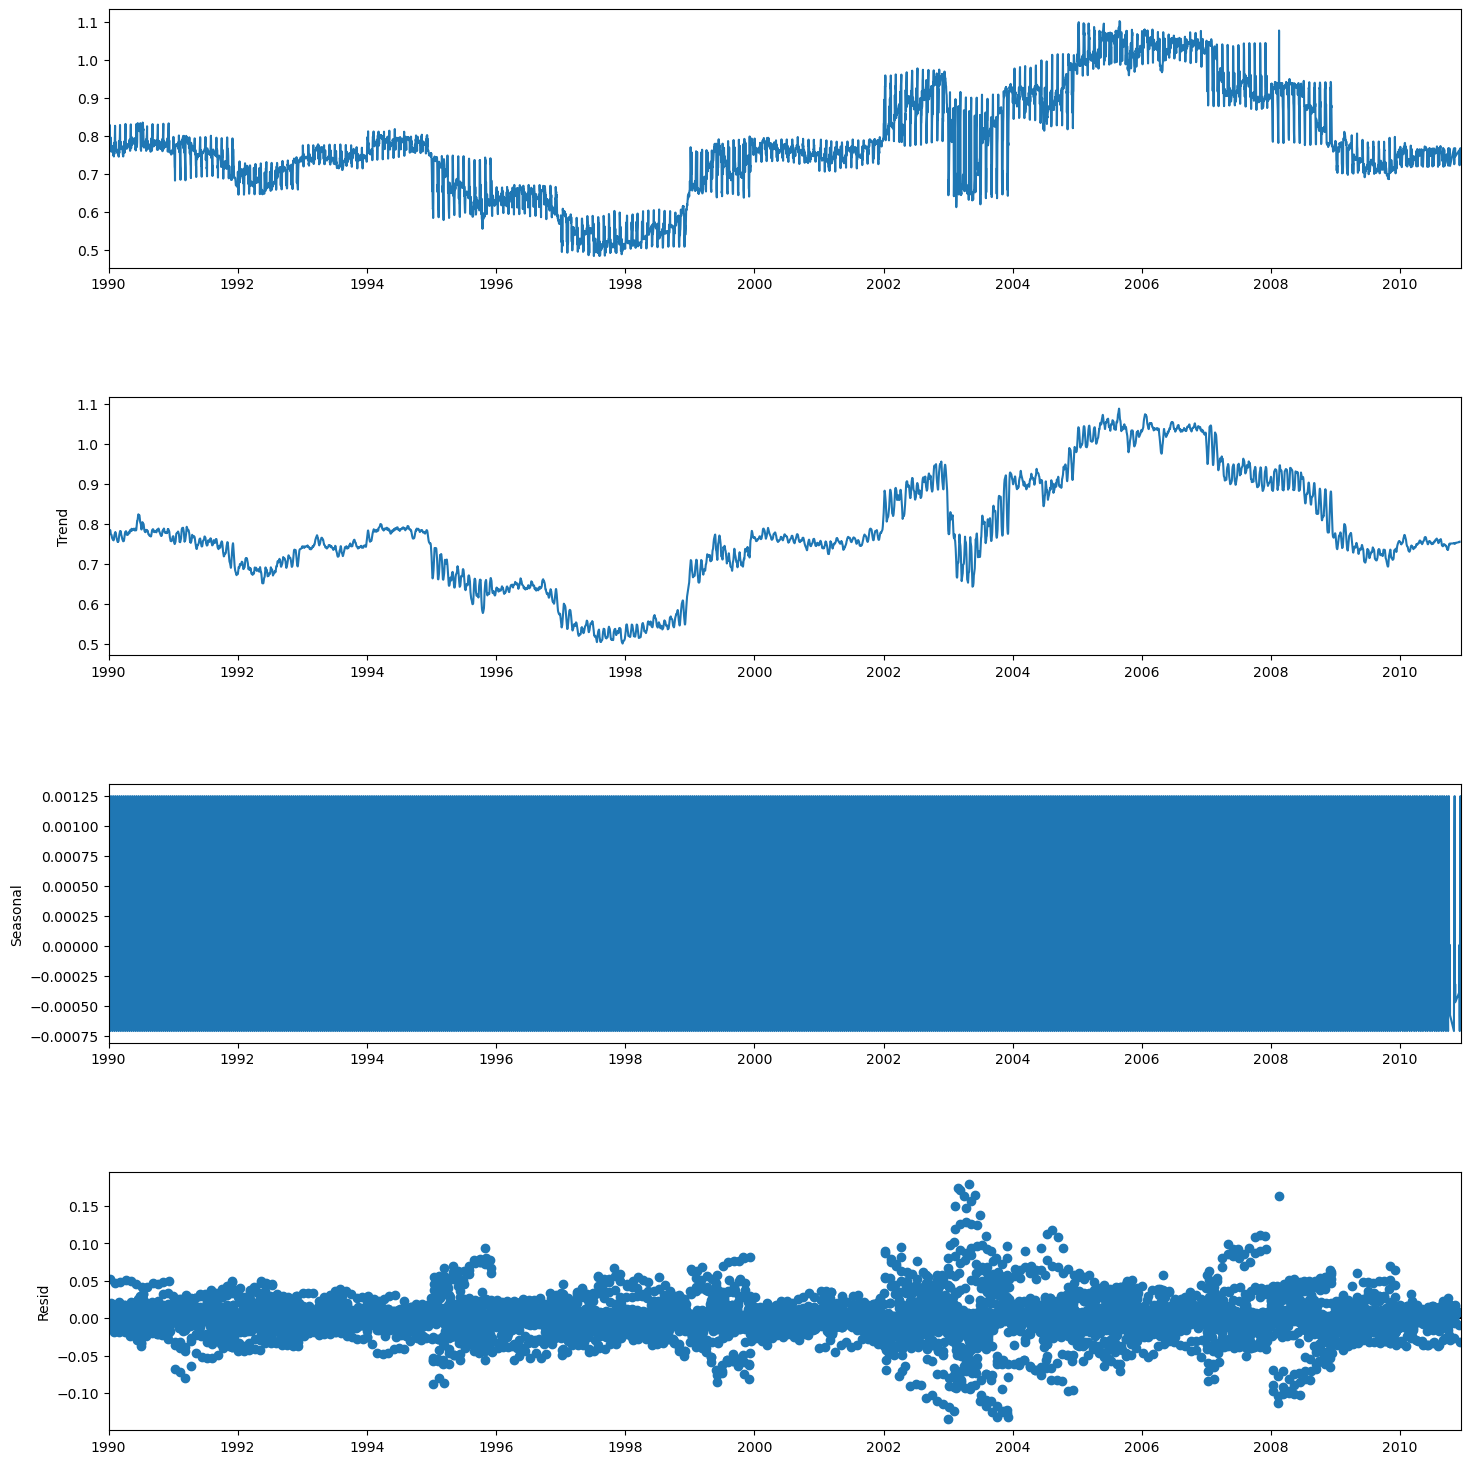

In [9]:
result=seasonal_decompose(data,period=12)
fig=result.plot()
fig.set_size_inches((16,16))
plt.show()

In [10]:
result=adfuller(data)
print('Stationary series' if result[1]<0.05 else 'Non-Stationary series')

Non-Stationary series


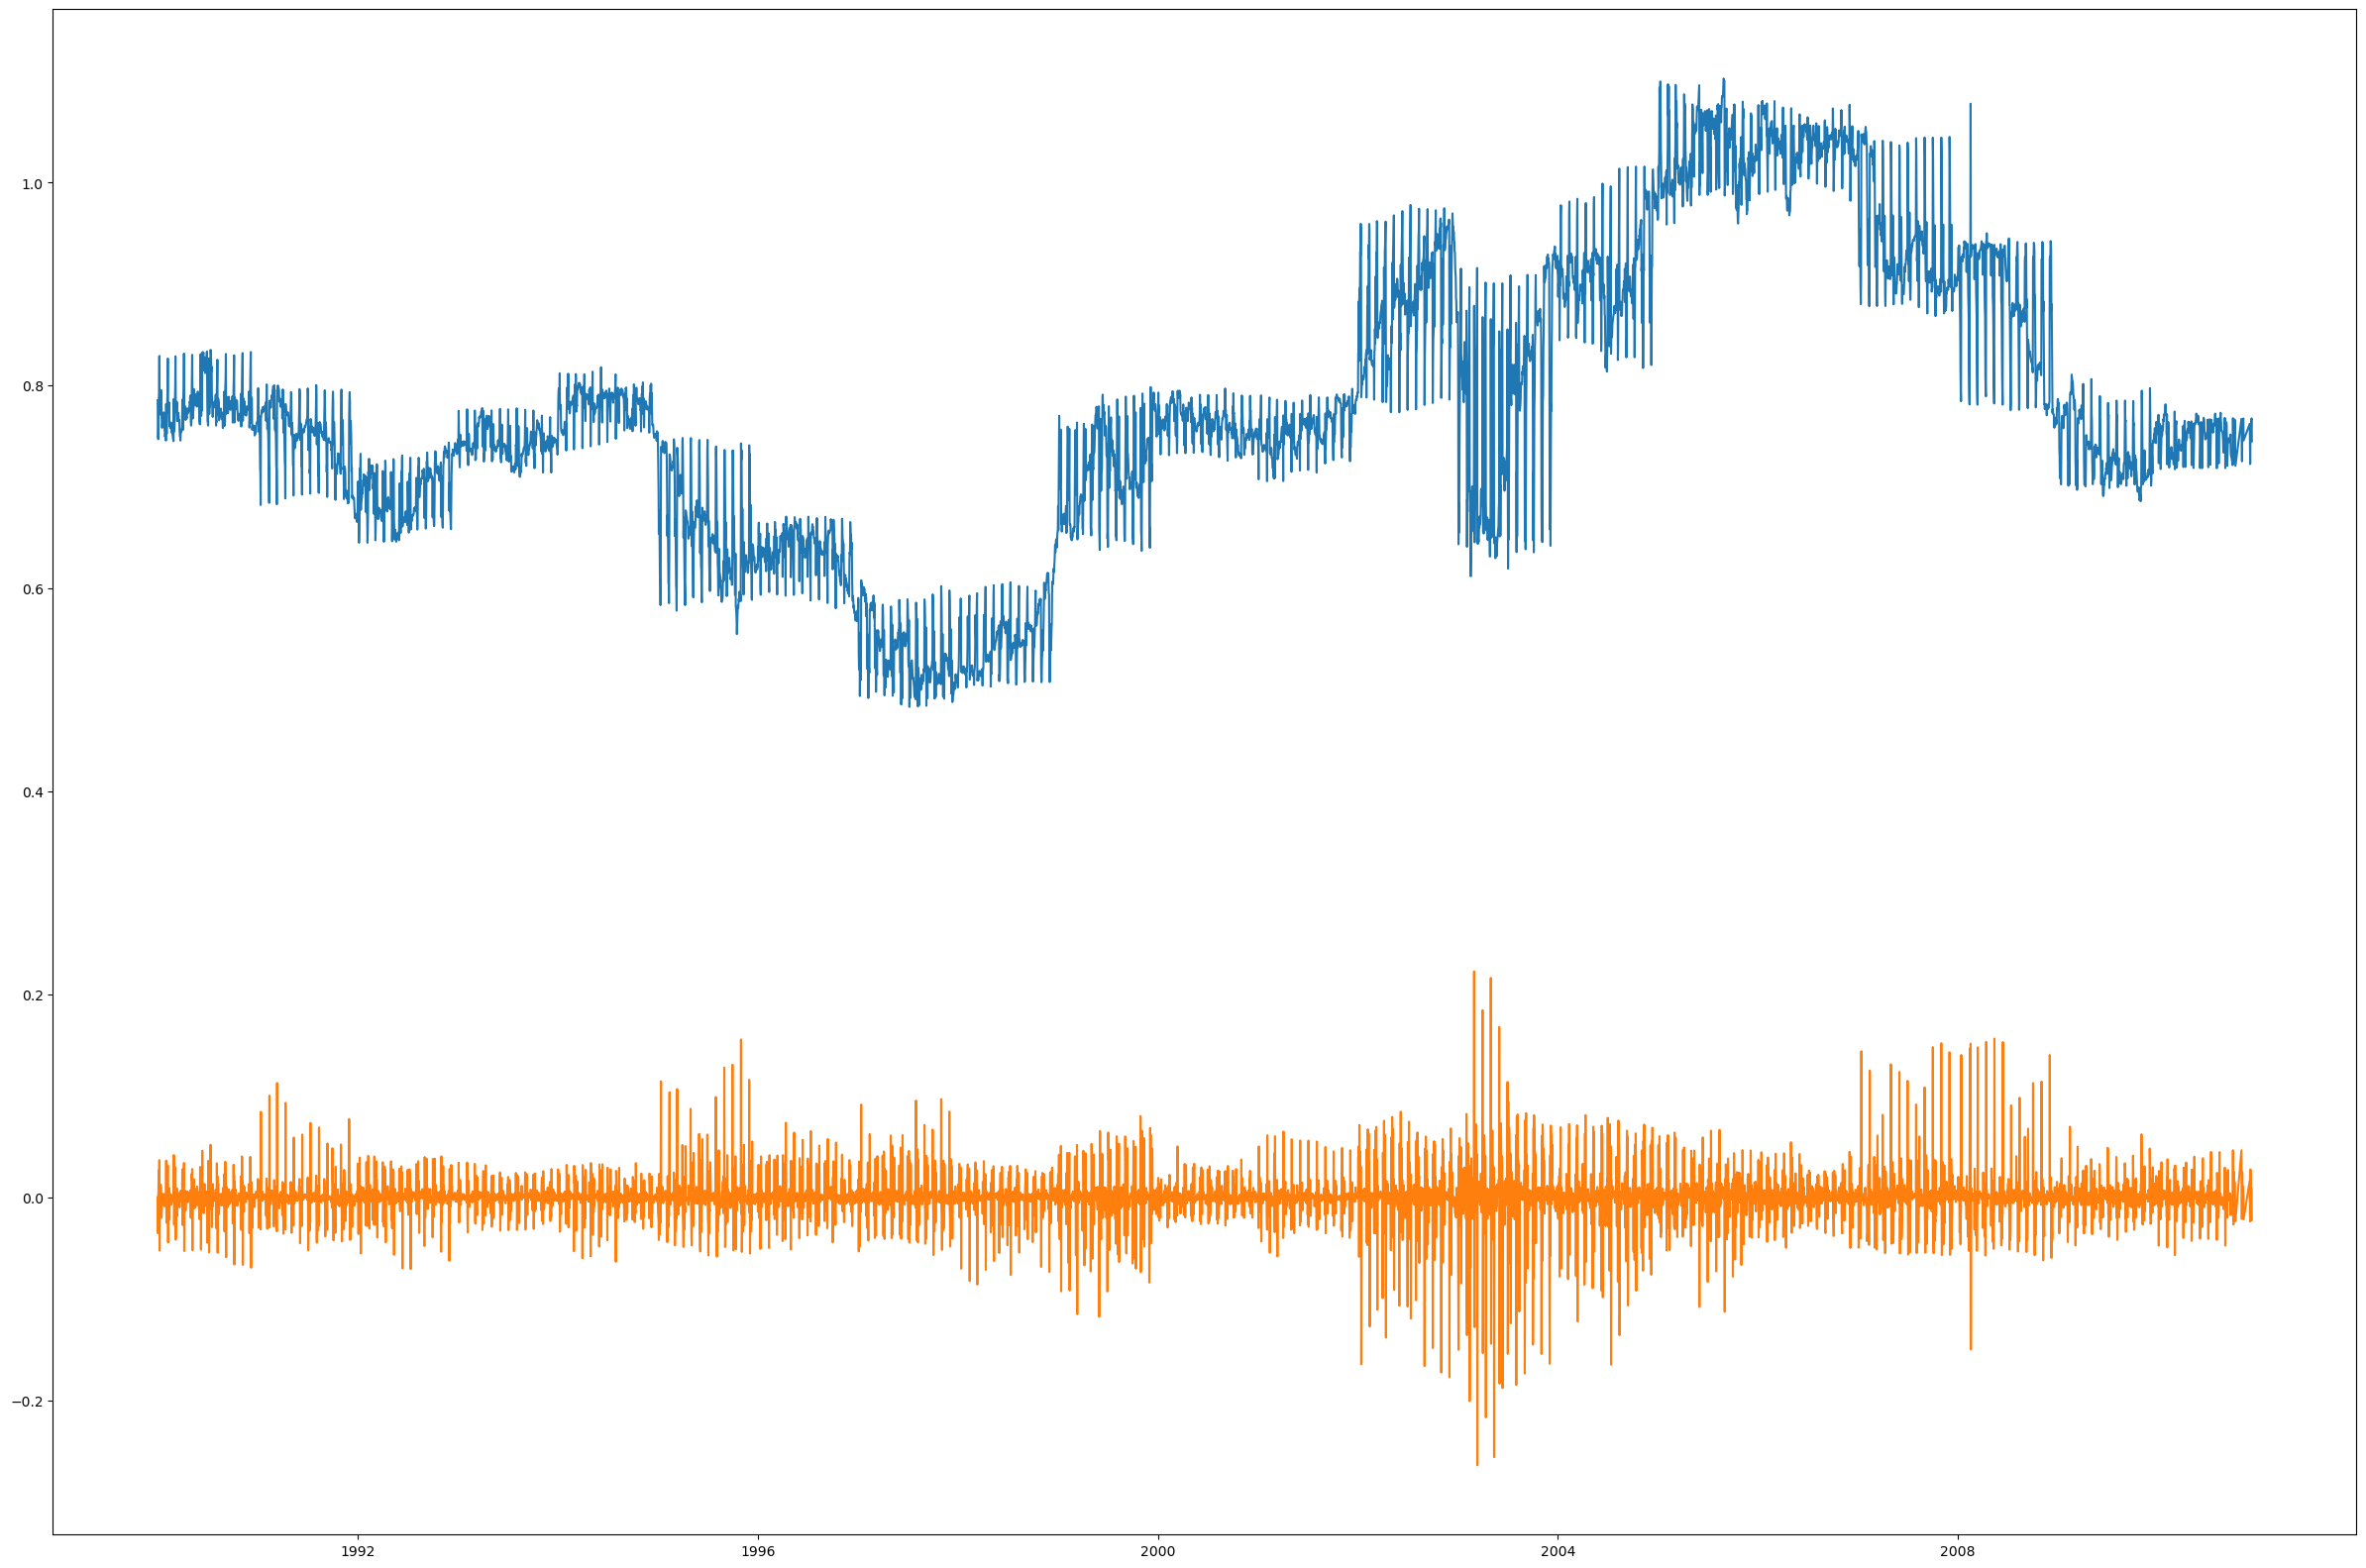

In [11]:
data['Ex_rate_diff']=data.diff().fillna(0)

plt.figure(figsize=(30,20))
plt.plot(data)
plt.show()

In [12]:
result=adfuller(data['Ex_rate_diff'])
print('Stationary series' if result[1]<0.05 else 'Non-Stationary series')

Stationary series


C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


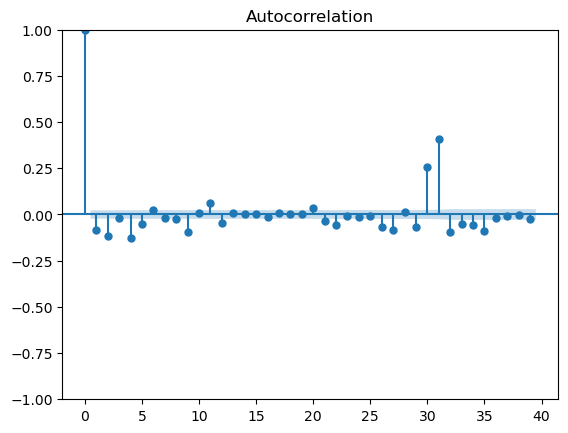

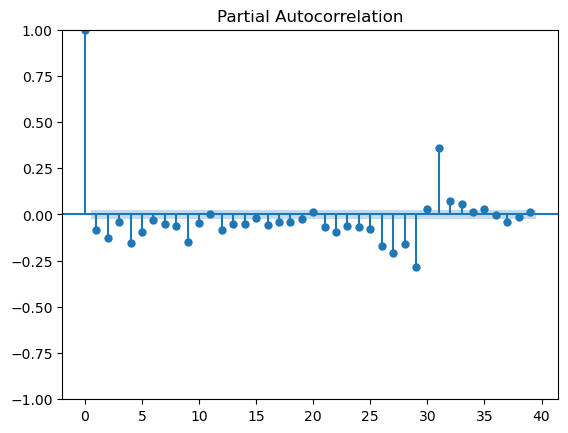

In [13]:
plot_acf(data['Ex_rate_diff'])

plot_pacf(data['Ex_rate_diff'])

plt.show()

In [8]:
train=data['Ex_rate'][:len(data['Ex_rate'])-15]
test=data['Ex_rate'][len(data['Ex_rate'])-15:]

## 💠ARIMA

In [9]:
Model_0=ARIMA(train,order=(1,1,1))
Model_0_fit=Model_0.fit()
Model_0_fit.summary()

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7573
Model:                 ARIMA(1, 1, 1)   Log Likelihood               17838.753
Date:                Sat, 28 Sep 2024   AIC                         -35671.506
Time:                        19:15:54   BIC                         -35650.710
Sample:                             0   HQIC                        -35664.368
                               - 7573                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7342      0.005    146.931      0.000       0.724       0.744
ma.L1         -0.9597      0.003   -372.852      0.000      -0.965      -0.955
sigma2         0.0005   3.45e-06    152.405      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  10.56   Jarque-Bera (JB):             68146.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

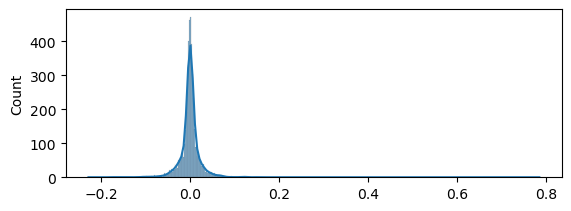

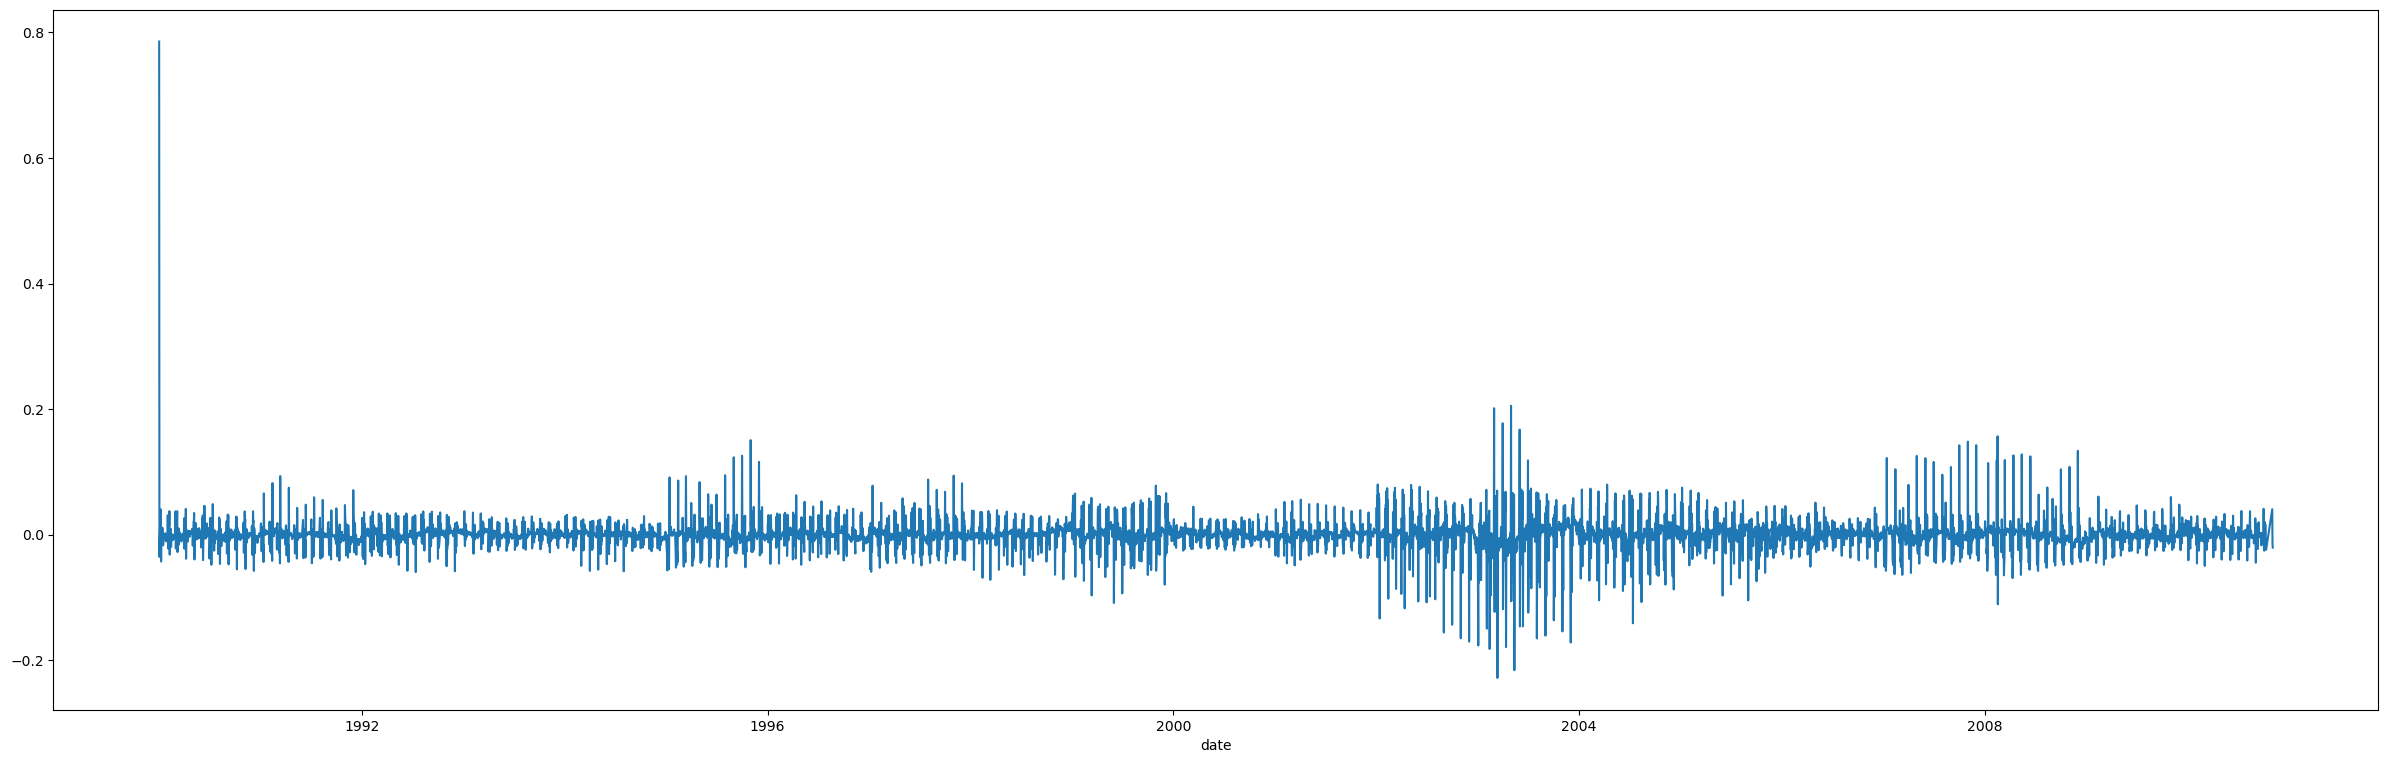

In [16]:
residuals=Model_0_fit.resid

plt.subplot(2,1,1)
sns.histplot(residuals,kde=True)


plt.figure(figsize=(30,20))
plt.subplot(2,1,2)
sns.lineplot(residuals)

plt.show()

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


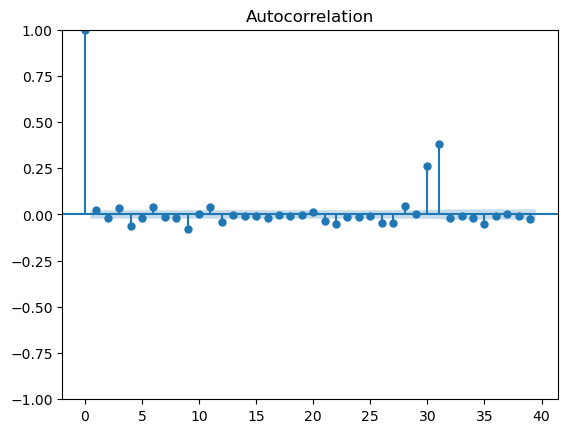

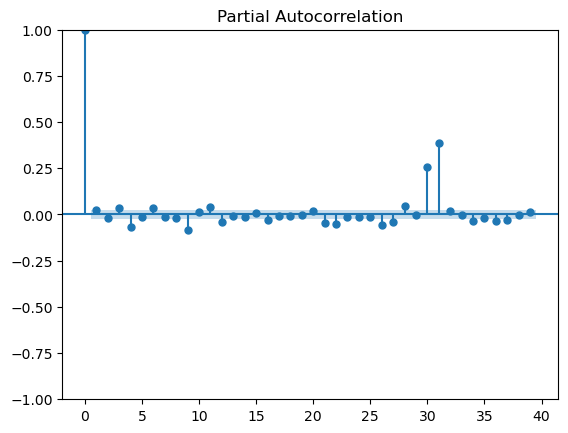

In [17]:
plot_acf(residuals)

plot_pacf(residuals)

plt.show()

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean_absolute_error  0.017269834892512933
Root_Mean_absolute_error  0.019137280252639378


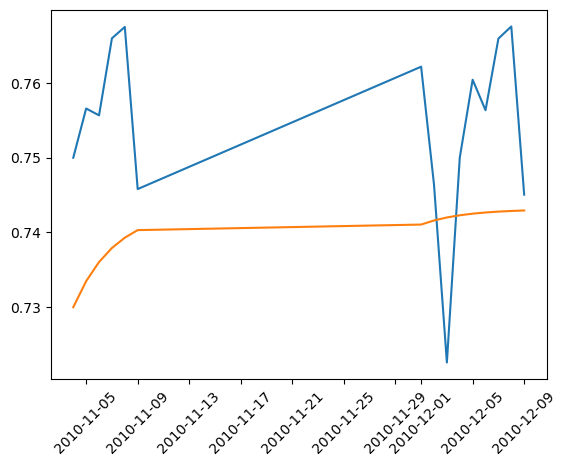

In [10]:
forecast_test=Model_0_fit.forecast(15)
forecast_test=pd.DataFrame(forecast_test).set_index(test.index)

print('Mean_absolute_error ',mean_absolute_error(test,forecast_test))
print('Root_Mean_absolute_error ',np.sqrt(mean_squared_error(test,forecast_test)))

plt.plot(test)
plt.plot(forecast_test)
plt.xticks(rotation=45)
plt.show()

## 💠Auto-ARIMA

In [11]:
import pmdarima as pm
Auto_arima=pm.auto_arima(train)
Auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean_absolute_error  0.0168425771603184
Root_Mean_absolute_error  0.01872006536740913


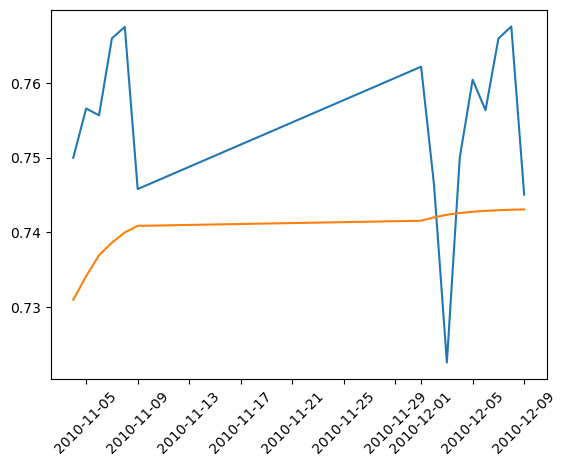

In [12]:
forecast_test_auto=Auto_arima.predict(15)
forecast_test_auto=pd.DataFrame(forecast_test_auto).set_index(test.index)

print('Mean_absolute_error ',mean_absolute_error(test,forecast_test_auto))
print('Root_Mean_absolute_error ',np.sqrt(mean_squared_error(test,forecast_test_auto)))

plt.plot(test)
plt.plot(forecast_test_auto)
plt.xticks(rotation=45)
plt.show()

## 💠ExponentialSmoothing: holtwinters

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Best_model={
    'Model_num':['Model'+str(x) for x in range(1,126)],
    'Params':[],
    'MAE':[]
}

for i in [0,0.1,0.5,1,1.1]:                         # smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k
    for j in [0,0.1,0.5,1,1.1]:
        for k in [0,0.1,0.5,1,1.1]:
            model=ExponentialSmoothing(train,seasonal_periods=12)
            model=model.fit(i,j,k)
            forecast=model.forecast(15)
            MAE=mean_absolute_error(test,forecast)
            Best_model['Params'].append((i,j,k))
            Best_model['MAE'].append(MAE)
            
Best_model=pd.DataFrame(Best_model).set_index('Model_num')

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaco

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaco

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaco

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaco

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaco

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaco

In [15]:
print('Best model: ',Best_model[Best_model['MAE']==Best_model['MAE'].min()])

Best model:                      Params      MAE
Model_num                          
Model26        (0.1, 0, 0)  0.01326
Model27      (0.1, 0, 0.1)  0.01326
Model28      (0.1, 0, 0.5)  0.01326
Model29        (0.1, 0, 1)  0.01326
Model30      (0.1, 0, 1.1)  0.01326
Model31      (0.1, 0.1, 0)  0.01326
Model32    (0.1, 0.1, 0.1)  0.01326
Model33    (0.1, 0.1, 0.5)  0.01326
Model34      (0.1, 0.1, 1)  0.01326
Model35    (0.1, 0.1, 1.1)  0.01326
Model36      (0.1, 0.5, 0)  0.01326
Model37    (0.1, 0.5, 0.1)  0.01326
Model38    (0.1, 0.5, 0.5)  0.01326
Model39      (0.1, 0.5, 1)  0.01326
Model40    (0.1, 0.5, 1.1)  0.01326
Model41        (0.1, 1, 0)  0.01326
Model42      (0.1, 1, 0.1)  0.01326
Model43      (0.1, 1, 0.5)  0.01326
Model44        (0.1, 1, 1)  0.01326
Model45      (0.1, 1, 1.1)  0.01326
Model46      (0.1, 1.1, 0)  0.01326
Model47    (0.1, 1.1, 0.1)  0.01326
Model48    (0.1, 1.1, 0.5)  0.01326
Model49      (0.1, 1.1, 1)  0.01326
Model50    (0.1, 1.1, 1.1)  0.01326


In [16]:
ES_model=ExponentialSmoothing(train,seasonal_periods=12)
ES_model=ES_model.fit(0.1,0,0)

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean_absolute_error  0.013259696484070934
Root_Mean_absolute_error  0.015516480102262776


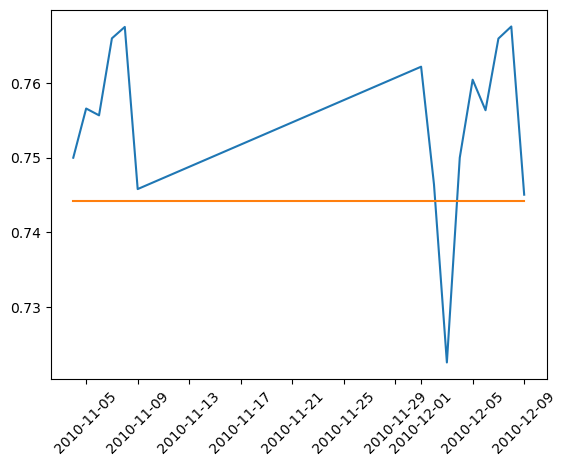

In [17]:
forecast_test_ES=ES_model.forecast(15)
forecast_test_ES=pd.DataFrame(forecast_test_ES).set_index(test.index)

print('Mean_absolute_error ',mean_absolute_error(test,forecast_test_ES))
print('Root_Mean_absolute_error ',np.sqrt(mean_squared_error(test,forecast_test_ES)))

plt.plot(test)
plt.plot(forecast_test_ES)
plt.xticks(rotation=45)
plt.show()

## 💠Evaluation and Comparison

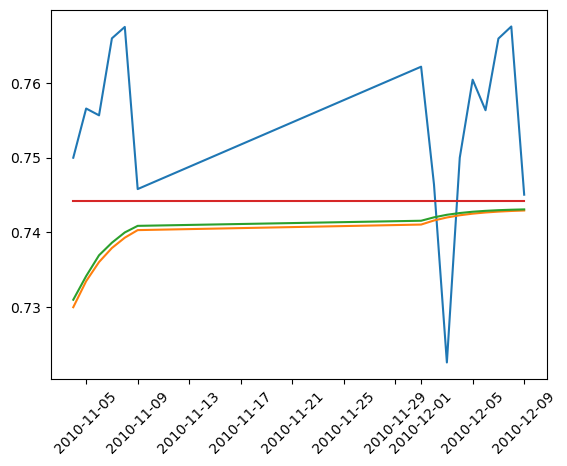

In [18]:
plt.plot(test)
plt.plot(forecast_test)            #................Simple model result       [Orange]
plt.plot(forecast_test_auto)       #................With auto ARIMA           [Green]
plt.plot(forecast_test_ES)         #................With ExponentialSmoothing [Red]
plt.xticks(rotation=45)
plt.show()

## Evaluation:

#### ▶ARIMA model: 
Mean_absolute_error  0.017269834892512933

Root_Mean_absolute_error  0.019137280252639378

# ____________________________________________________________

#### ▶Auto_ARIMA model:
Mean_absolute_error  0.0168425771603184

Root_Mean_absolute_error  0.01872006536740913

# ____________________________________________________________

#### ▶ExponentialSmoothing: holtwinters
Mean_absolute_error  0.013259696484070934

Root_Mean_absolute_error  0.015516480102262776

# ____________________________________________________________

### Conclusion: ExponentialSmoothing model is the best performing model as it shows the least error.